In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
divvy_data = pd.read_csv('data/divvy_zip_summer_15.csv')
divvy_data.head()

,trip_id,start_time,stop_time,user_type,from_lat,from_lon,to_lat,to_lon,zip
0,7221407,2015-08-31 23:59:00,2015-09-01 00:03:00,Subscriber,41.871737,-87.651030,41.877726,-87.654787,60607
1,7221406,2015-08-31 23:58:00,2015-09-01 00:26:00,Customer,41.914027,-87.705126,41.916017,-87.668879,60647
2,7221404,2015-08-31 23:57:00,2015-09-01 00:05:00,Subscriber,41.885464,-87.641253,41.893992,-87.629318,60661
3,7221405,2015-08-31 23:57:00,2015-09-01 00:06:00,Customer,41.952833,-87.649993,41.939743,-87.658865,60613
4,7221403,2015-08-31 23:56:00,2015-09-01 00:08:00,Subscriber,41.933666,-87.648959,41.932595,-87.665939,60657


In [7]:
divvy_data['start_time']=pd.to_datetime(divvy_data['start_time'],format='%Y-%m-%d %H:%M:%S')

In [8]:
divvy_data.start_time

0        2015-08-31 23:59:00
1        2015-08-31 23:58:00
2        2015-08-31 23:57:00
3        2015-08-31 23:57:00
4        2015-08-31 23:56:00
5        2015-08-31 23:55:00
6        2015-08-31 23:55:00
7        2015-08-31 23:55:00
8        2015-08-31 23:55:00
9        2015-08-31 23:54:00
10       2015-08-31 23:53:00
11       2015-08-31 23:53:00
12       2015-08-31 23:53:00
13       2015-08-31 23:52:00
14       2015-08-31 23:51:00
15       2015-08-31 23:51:00
16       2015-08-31 23:51:00
17       2015-08-31 23:50:00
18       2015-08-31 23:50:00
19       2015-08-31 23:50:00
20       2015-08-31 23:50:00
21       2015-08-31 23:48:00
22       2015-08-31 23:47:00
23       2015-08-31 23:47:00
24       2015-08-31 23:46:00
25       2015-08-31 23:45:00
26       2015-08-31 23:45:00
27       2015-08-31 23:43:00
28       2015-08-31 23:43:00
29       2015-08-31 23:42:00
                 ...        
999970   2015-07-02 18:44:00
999971   2015-07-02 18:44:00
999972   2015-07-02 18:44:00
999973   2015-

In [9]:
divvy_data['stop_time']=pd.to_datetime(divvy_data['stop_time'],format='%Y-%m-%d %H:%M:%S')

In [10]:
divvy_data.stop_time

0        2015-09-01 00:03:00
1        2015-09-01 00:26:00
2        2015-09-01 00:05:00
3        2015-09-01 00:06:00
4        2015-09-01 00:08:00
5        2015-09-01 00:14:00
6        2015-09-01 00:16:00
7        2015-09-01 00:00:00
8        2015-09-01 00:14:00
9        2015-09-01 00:07:00
10       2015-09-01 00:05:00
11       2015-09-01 00:04:00
12       2015-09-01 00:05:00
13       2015-08-31 23:55:00
14       2015-08-31 23:59:00
15       2015-09-01 00:18:00
16       2015-09-01 00:03:00
17       2015-09-01 00:00:00
18       2015-09-01 00:09:00
19       2015-08-31 23:55:00
20       2015-09-01 00:09:00
21       2015-09-01 00:11:00
22       2015-09-01 00:22:00
23       2015-08-31 23:55:00
24       2015-08-31 23:54:00
25       2015-09-01 00:02:00
26       2015-08-31 23:56:00
27       2015-08-31 23:57:00
28       2015-08-31 23:48:00
29       2015-08-31 23:52:00
                 ...        
999970   2015-07-02 19:16:00
999971   2015-07-02 18:50:00
999972   2015-07-02 18:53:00
999973   2015-

In [11]:
divvy_data['trip_time'] = divvy_data['stop_time']- divvy_data['start_time']

In [13]:
divvy_data.head()

,trip_id,start_time,stop_time,user_type,from_lat,from_lon,to_lat,to_lon,zip,trip_time
0,7221407,2015-08-31 23:59:00,2015-09-01 00:03:00,Subscriber,41.871737,-87.651030,41.877726,-87.654787,60607,00:04:00
1,7221406,2015-08-31 23:58:00,2015-09-01 00:26:00,Customer,41.914027,-87.705126,41.916017,-87.668879,60647,00:28:00
2,7221404,2015-08-31 23:57:00,2015-09-01 00:05:00,Subscriber,41.885464,-87.641253,41.893992,-87.629318,60661,00:08:00
3,7221405,2015-08-31 23:57:00,2015-09-01 00:06:00,Customer,41.952833,-87.649993,41.939743,-87.658865,60613,00:09:00
4,7221403,2015-08-31 23:56:00,2015-09-01 00:08:00,Subscriber,41.933666,-87.648959,41.932595,-87.665939,60657,00:12:00


In [16]:
divvy_data.trip_time.describe()

count                   1000000
mean     0 days 00:19:03.077700
std      0 days 00:34:06.328294
min             0 days 00:01:00
25%             0 days 00:08:00
50%             0 days 00:14:00
75%             0 days 00:22:00
max             0 days 23:59:00
Name: trip_time, dtype: object

In [17]:
divvy_data.hist(column = 'trip_time')

ValueError: num must be 1 <= num <= 0, not 1

In [18]:
(divvy_data['trip_time'] / np.timedelta64(1, 'M')).astype(int)

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
999970    0
999971    0
999972    0
999973    0
999974    0
999975    0
999976    0
999977    0
999978    0
999979    0
999980    0
999981    0
999982    0
999983    0
999984    0
999985    0
999986    0
999987    0
999988    0
999989    0
999990    0
999991    0
999992    0
999993    0
999994    0
999995    0
999996    0
999997    0
999998    0
999999    0
Name: trip_time, dtype: int32

In [19]:
divvy_data['trip_time'].astype('timedelta64[m]')

0          4.0
1         28.0
2          8.0
3          9.0
4         12.0
5         19.0
6         21.0
7          5.0
8         19.0
9         13.0
10        12.0
11        11.0
12        12.0
13         3.0
14         8.0
15        27.0
16        12.0
17        10.0
18        19.0
19         5.0
20        19.0
21        23.0
22        35.0
23         8.0
24         8.0
25        17.0
26        11.0
27        14.0
28         5.0
29        10.0
          ... 
999970    32.0
999971     6.0
999972     9.0
999973     6.0
999974     3.0
999975    24.0
999976     4.0
999977     8.0
999978     6.0
999979    11.0
999980    12.0
999981     6.0
999982    22.0
999983    11.0
999984    20.0
999985    21.0
999986    22.0
999987     8.0
999988    22.0
999989     7.0
999990     6.0
999991    23.0
999992    17.0
999993     3.0
999994     8.0
999995     8.0
999996    10.0
999997     4.0
999998    76.0
999999     9.0
Name: trip_time, dtype: float64

In [20]:
divvy_data['trip_time_mins'] = divvy_data['trip_time'].astype('timedelta64[m]')

In [21]:
divvy_data.head()

,trip_id,start_time,stop_time,user_type,from_lat,from_lon,to_lat,to_lon,zip,trip_time,trip_time_mins
0,7221407,2015-08-31 23:59:00,2015-09-01 00:03:00,Subscriber,41.871737,-87.651030,41.877726,-87.654787,60607,00:04:00,4.0
1,7221406,2015-08-31 23:58:00,2015-09-01 00:26:00,Customer,41.914027,-87.705126,41.916017,-87.668879,60647,00:28:00,28.0
2,7221404,2015-08-31 23:57:00,2015-09-01 00:05:00,Subscriber,41.885464,-87.641253,41.893992,-87.629318,60661,00:08:00,8.0
3,7221405,2015-08-31 23:57:00,2015-09-01 00:06:00,Customer,41.952833,-87.649993,41.939743,-87.658865,60613,00:09:00,9.0
4,7221403,2015-08-31 23:56:00,2015-09-01 00:08:00,Subscriber,41.933666,-87.648959,41.932595,-87.665939,60657,00:12:00,12.0


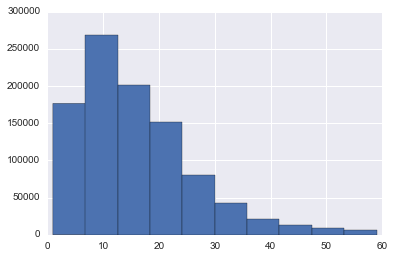

In [23]:
divvy_data[divvy_data['trip_time_mins'] < 60].trip_time_mins.hist()

In [26]:
divvy_data[divvy_data['trip_time_mins'] < 2]['trip_time_mins'].count()

3183

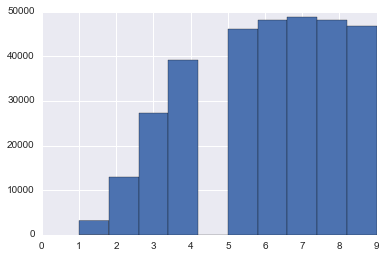

In [27]:
divvy_data[divvy_data['trip_time_mins'] < 10]['trip_time_mins'].hist()

In [30]:
divvy_data[(divvy_data['from_lat'] == divvy_data['to_lat']) & (divvy_data['trip_time_mins'] < 4)].trip_time_mins.count()

6760

In [31]:
divvy_data[(divvy_data['from_lat'] != divvy_data['to_lat']) & (divvy_data['trip_time_mins'] < 4)].trip_time_mins.count()

36496

In [32]:
divvy_data[divvy_data['trip_time_mins'] >30].trip_time_mins.count()

109883

In [33]:
divvy_data.head()

,trip_id,start_time,stop_time,user_type,from_lat,from_lon,to_lat,to_lon,zip,trip_time,trip_time_mins
0,7221407,2015-08-31 23:59:00,2015-09-01 00:03:00,Subscriber,41.871737,-87.651030,41.877726,-87.654787,60607,00:04:00,4.0
1,7221406,2015-08-31 23:58:00,2015-09-01 00:26:00,Customer,41.914027,-87.705126,41.916017,-87.668879,60647,00:28:00,28.0
2,7221404,2015-08-31 23:57:00,2015-09-01 00:05:00,Subscriber,41.885464,-87.641253,41.893992,-87.629318,60661,00:08:00,8.0
3,7221405,2015-08-31 23:57:00,2015-09-01 00:06:00,Customer,41.952833,-87.649993,41.939743,-87.658865,60613,00:09:00,9.0
4,7221403,2015-08-31 23:56:00,2015-09-01 00:08:00,Subscriber,41.933666,-87.648959,41.932595,-87.665939,60657,00:12:00,12.0


In [35]:
divvy_data.user_type.unique()

array(['Subscriber', 'Customer', 'Dependent'], dtype=object)

In [37]:
divvy_data.groupby("user_type").count()

,trip_id,start_time,stop_time,from_lat,from_lon,to_lat,to_lon,zip,trip_time,trip_time_mins
user_type,,,,,,,,,,
Customer,375105,375105,375105,375105,375105,375105,375105,375105,375105,375105
Dependent,45,45,45,45,45,45,45,45,45,45
Subscriber,624850,624850,624850,624850,624850,624850,624850,624850,624850,624850
